<a href="https://colab.research.google.com/github/Marcozambeli/Control-Theory-II---UFJF/blob/master/Aula_3B_Diagrama_de_Bode_Controle_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 3 - Diagramas de Bode

## Fatores de Primeira Ordem 

$G(s) = \frac{1}{s+1}$

In [ ]:
import numpy as np
from plotly import graph_objects as go
from plotly.subplots import make_subplots

w_baixo = np.logspace(-4,0,5)
w_alto = np.logspace(1,4,4)
w = np.concatenate( (w_baixo, w_alto) )

# Calcula Aproximacao Assintotica para Modulo de G(jw)

gjw_baixo = np.zeros(5, dtype=float)
gjw_alto = -20*np.log10(w_alto)
gjw = np.concatenate( (gjw_baixo, gjw_alto) )

# Calcula Curva Real
gjw_real = -20*np.log10( np.sqrt(1+pow(w,2)*1) )

figura = make_subplots(specs=[[{"secondary_y": True}]])

figura.add_trace(go.Scatter(y=gjw,x=w,name="Aproximacao Assintotica"),secondary_y=False)
figura.add_trace(go.Scatter(y=gjw_real,x=w,name="Curva Real"),secondary_y=False)

figura.update_xaxes(type="log")

figura.update_layout(
    title="Diagrama de Bode",
    xaxis_title="Freqüência em rad/s",
    yaxis_title="Módulo de $G(j \omega)$ em dB"
)

# Calcula Ângulo

phi = -np.arctan(w)*180/np.pi
figura.add_trace(go.Scatter(x=w, y=phi, name="Angulo de G(jw)"),secondary_y=True)

figura.update_yaxes(title="Ângulo de G(jw)", secondary_y=True)
figura.show()


In [ ]:
!pip install control

     |████████████████████████████████| 256kB 2.8MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=0a760b170e99772562a8943afa79a03972706e378ff77cc70a383492b41424d1
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


In [ ]:
!pip install control

     |████████████████████████████████| 256kB 2.6MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=a9cd7d0d70ce5f28e3861012cb0d215d239786a8bc785353c27633631513221e
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


## Fatores Quadrádicos

$G(s)= \frac{\omega_n^2}{s^2+2\zeta\omega_ns+\omega_n^2}$

[   1.            1.1513954     1.32571137    1.52641797    1.75751062
    2.02358965    2.32995181    2.6826958     3.0888436     3.55648031
    4.09491506    4.71486636    5.42867544    6.25055193    7.19685673
    8.28642773    9.54095476   10.98541142   12.64855217   14.56348478
   16.76832937   19.30697729   22.22996483   25.59547923   29.47051703
   33.93221772   39.06939937   44.98432669   51.79474679   59.63623317
   68.6648845    79.06043211   91.0298178   104.81131342  120.67926406
  138.94954944  159.98587196  184.20699693  212.09508879  244.20530945
  281.1768698   323.74575428  372.75937203  429.19342601  494.17133613
  568.9866029   655.12855686  754.31200634  868.51137375 1000.        ]
1.526417973145698


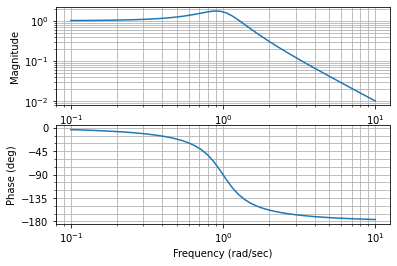

In [ ]:
import numpy as np
from plotly import graph_objects as go
from plotly.subplots import make_subplots
from control import *

wn = 1
qsi = 0.3

w_baixo = np.logspace(-1,0,50)
w_alto = np.logspace(0,2,50)
w = np.concatenate( (w_baixo, w_alto) )

# Calcula Aproximacao Assintotica para Modulo de G(jw)

gjw_baixo = np.zeros(50, dtype=float)
gjw_alto = -40*np.log10(w_alto/wn)
gjw = np.concatenate( (gjw_baixo, gjw_alto) )

# Calcula Curva Real (utilizando a biblioteca control)

num = [ wn**2]
den = [ 1, 2*qsi*wn, wn**2]
gs=tf(num,den)
gjw_real = bode(gs)
mag = gjw_real[0]
magdB = 20*np.log10(mag)
fase = gjw_real[1]*180/np.pi
w_novo = gjw_real[2]

figura = make_subplots(specs=[[{"secondary_y": True}]])

figura.add_trace(go.Scatter(y=gjw,x=w,name="Aproximacao Assintotica"),secondary_y=False)
figura.add_trace(go.Scatter(y=magdB,x=w_novo,name="Curva Real"),secondary_y=False)

figura.update_xaxes(type="log")

figura.update_layout(
    title="Diagrama de Bode",
    xaxis_title="Freqüência em rad/s",
    yaxis_title="Módulo de $G(j \omega)$ em dB"
)

# Calcula Ângulo

figura.add_trace(go.Scatter(x=w_novo, y=fase, name="Angulo de G(jw)"),secondary_y=True)

figura.update_yaxes(title="Ângulo de G(jw)", secondary_y=True)
figura.show()

